Practical 11

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../US_Superstore.xls', sheet_name='Orders')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
order_dates = df.groupby(['Order Date', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
ship_dates = df.groupby(['Ship Date', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

In [7]:
def date_to_numeric(dates):
    """Calculate number of days from the minimum date"""
    return (dates - dates.min()).dt.days

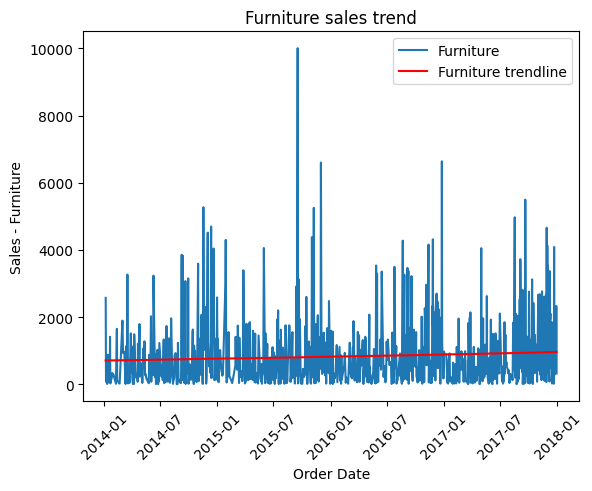

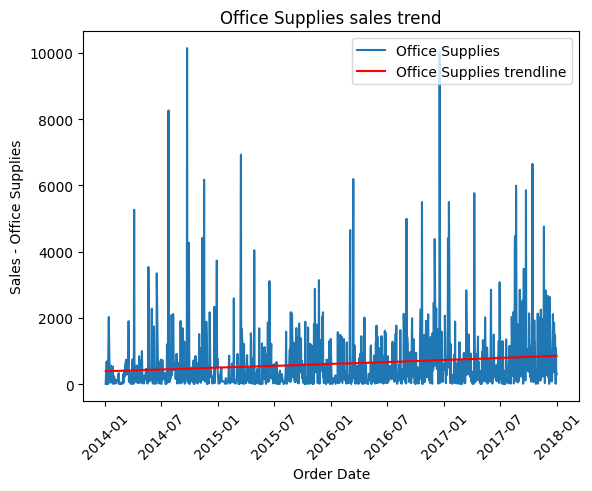

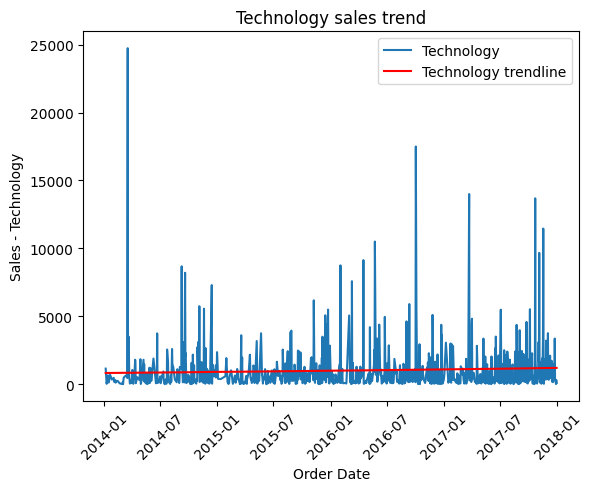

In [10]:
# Plot order date with sales and trendline of different category of the products.

for category, data in order_dates.groupby('Category'):
    x = date_to_numeric(data['Order Date'])
    y = data['Sales']
    plt.plot(data['Order Date'], y, label=category)
    z = np.polyfit(range(0, len(x)), y, 1)
    p = np.poly1d(z)
    plt.plot(data['Order Date'], p(range(0, len(x))), 'red', label=f"{category} trendline")
    plt.xlabel("Order Date")
    plt.ylabel(f"Sales - {category}")
    plt.title(f'{category} sales trend')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

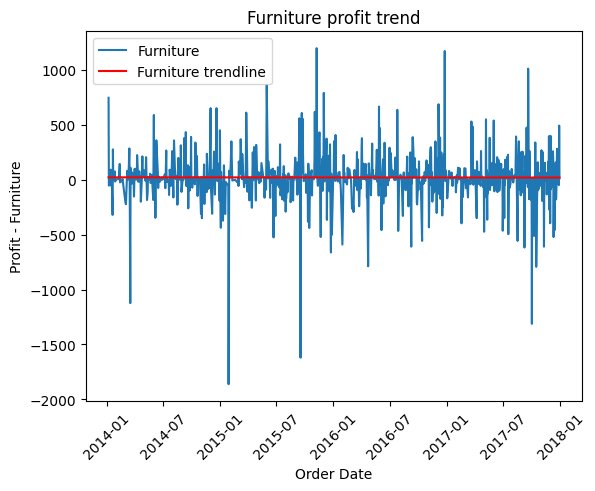

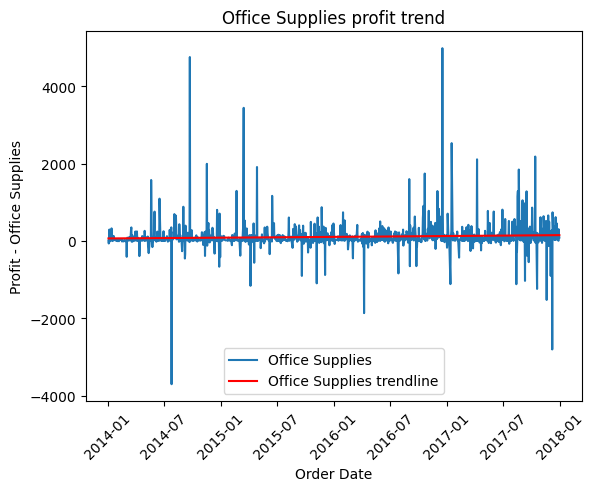

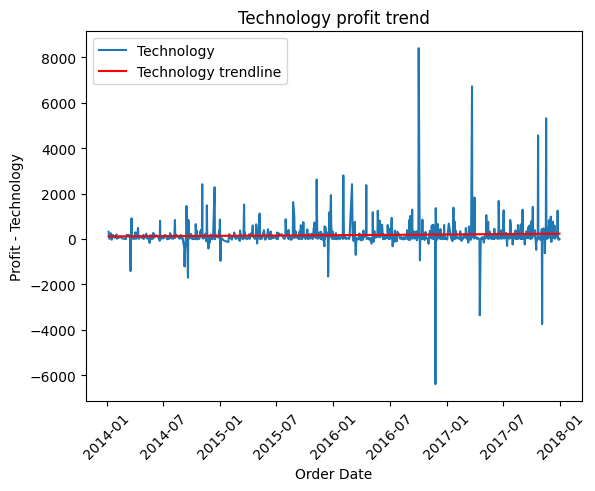

In [11]:
# Plot order date with profit and trendline of different category of the products.

for category, data in order_dates.groupby('Category'):
    x = date_to_numeric(data['Order Date'])
    y = data['Profit']
    plt.plot(data['Order Date'], y, label=category)
    z = np.polyfit(range(0, len(x)), y, 1)
    p = np.poly1d(z)
    plt.plot(data['Order Date'], p(range(0, len(x))), 'red', label=f"{category} trendline")
    plt.xlabel("Order Date")
    plt.ylabel(f"Profit - {category}")
    plt.title(f'{category} profit trend')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

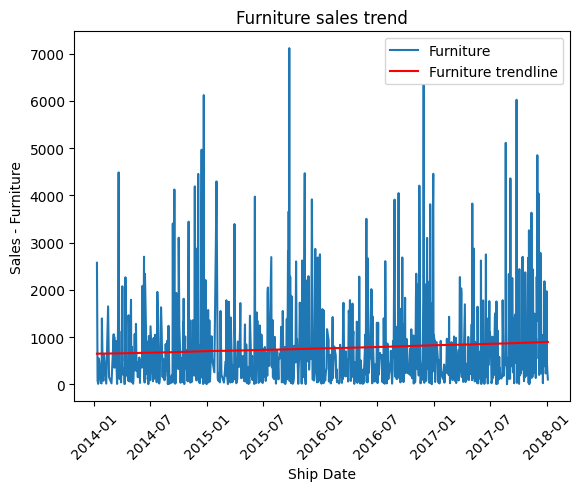

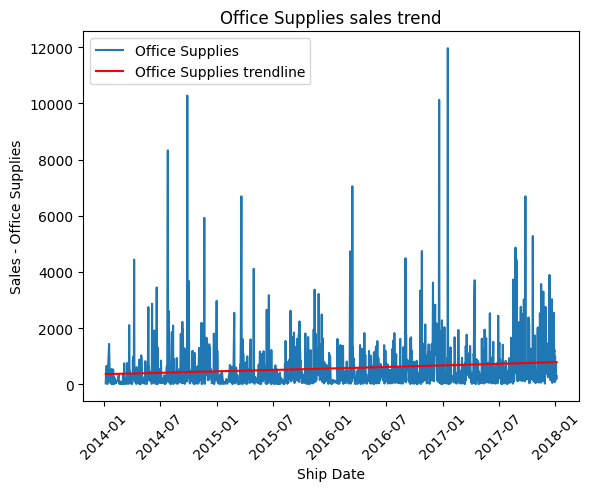

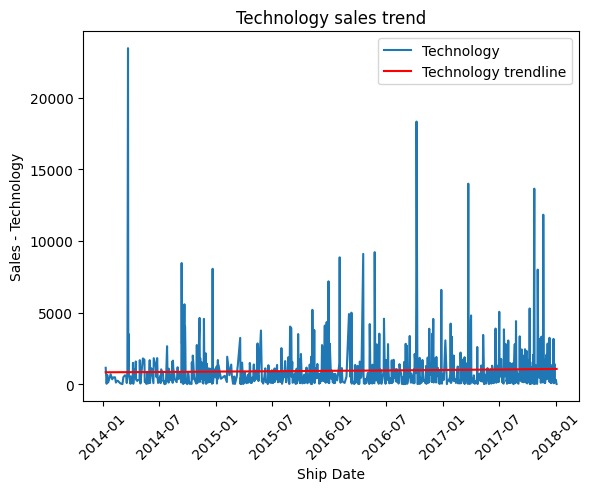

In [12]:
# Plot ship date with sales and trendline of different category of the products.

for category, data in ship_dates.groupby('Category'):
    x = date_to_numeric(data['Ship Date'])
    y = data['Sales']
    plt.plot(data['Ship Date'], y, label=category)
    z = np.polyfit(range(0, len(x)), y, 1)
    p = np.poly1d(z)
    plt.plot(data['Ship Date'], p(range(0, len(x))), 'red', label=f"{category} trendline")
    plt.xlabel("Ship Date")
    plt.ylabel(f"Sales - {category}")
    plt.title(f'{category} sales trend')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

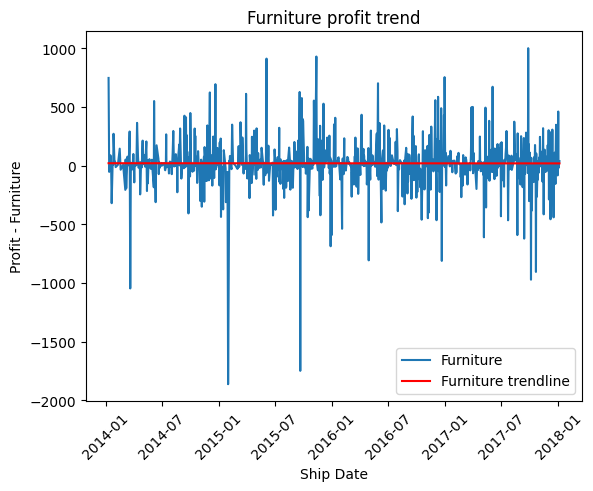

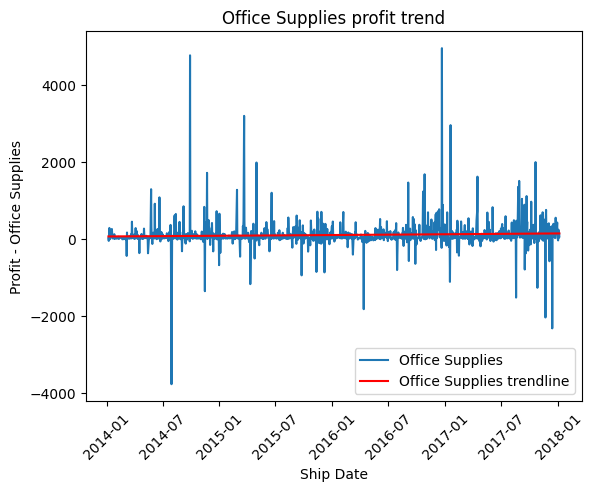

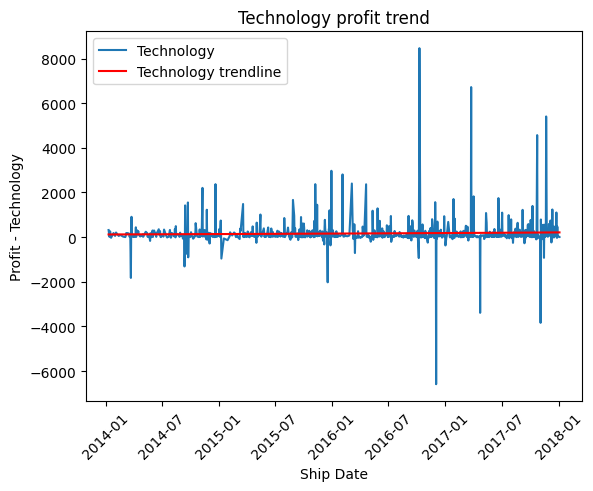

In [13]:
# Plot ship date with profit and trendline of different category of the products.

for category, data in ship_dates.groupby('Category'):
    x = date_to_numeric(data['Ship Date'])
    y = data['Profit']
    plt.plot(data['Ship Date'], y, label=category)
    z = np.polyfit(range(0, len(x)), y, 1)
    p = np.poly1d(z)
    plt.plot(data['Ship Date'], p(range(0, len(x))), 'red', label=f"{category} trendline")
    plt.xlabel("Ship Date")
    plt.ylabel(f"Profit - {category}")
    plt.title(f'{category} profit trend')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()